## STAGE D - HAMOYA PROJECT

I was presented with the Africa Food supply data to carry out analysis and visualizations to enable me write a story.

In [1]:
# Importing the required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import scipy.stats as st
from scipy.stats import pearsonr

In [2]:
# Importing and reading the data

africa_supply = pd.read_csv("African_foodSupply.csv")
africa_supply.head(10)

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
5,Algeria,2009,3110
6,Algeria,2010,3142
7,Algeria,2011,3217
8,Algeria,2012,3272
9,Algeria,2013,3296


In [3]:
# Shape(row and columns) of the data

africa_supply.shape

(450, 3)

In [4]:
# Checking the data info

africa_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [5]:
# Checking for null values

africa_supply.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [6]:
# Checking the data statistics

africa_supply.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


## Visualizations

In [7]:
# Total food supply for each year

year_g = pd.DataFrame(africa_supply.groupby(africa_supply["Year"])["Value"].sum()).reset_index()

year_g

,Year,Value
0,2004,107740
1,2005,108418
2,2006,109386
3,2007,110149
4,2008,110734
5,2009,111700
6,2010,112383
7,2011,113194
8,2012,113744
9,2013,113951


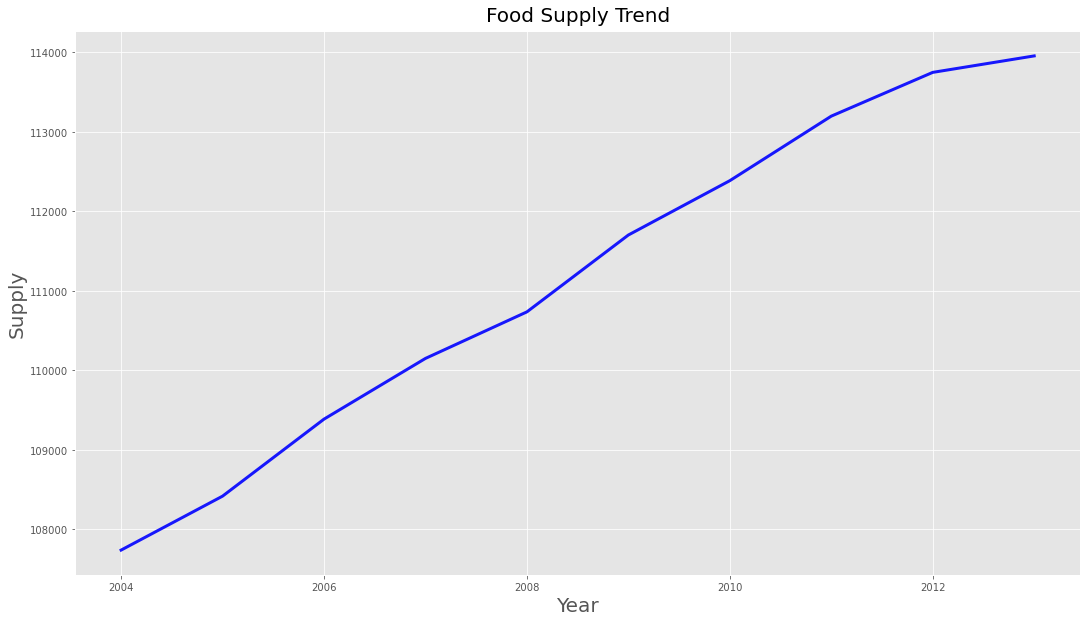

In [8]:
# Trend of Africa supply production

plt.figure(figsize = (18, 10))
plt.plot(year_g["Year"], year_g["Value"], linewidth = 3, alpha = 0.9, color = "blue")

plt.title("Food Supply Trend", fontsize = 20, pad = 10)
plt.xlabel("Year", size = 20)
plt.ylabel("Supply", size = 20)

plt.show()

As shown in the chart above, the supply of food products in African Countries have been on the rise between 2004 and 2013.

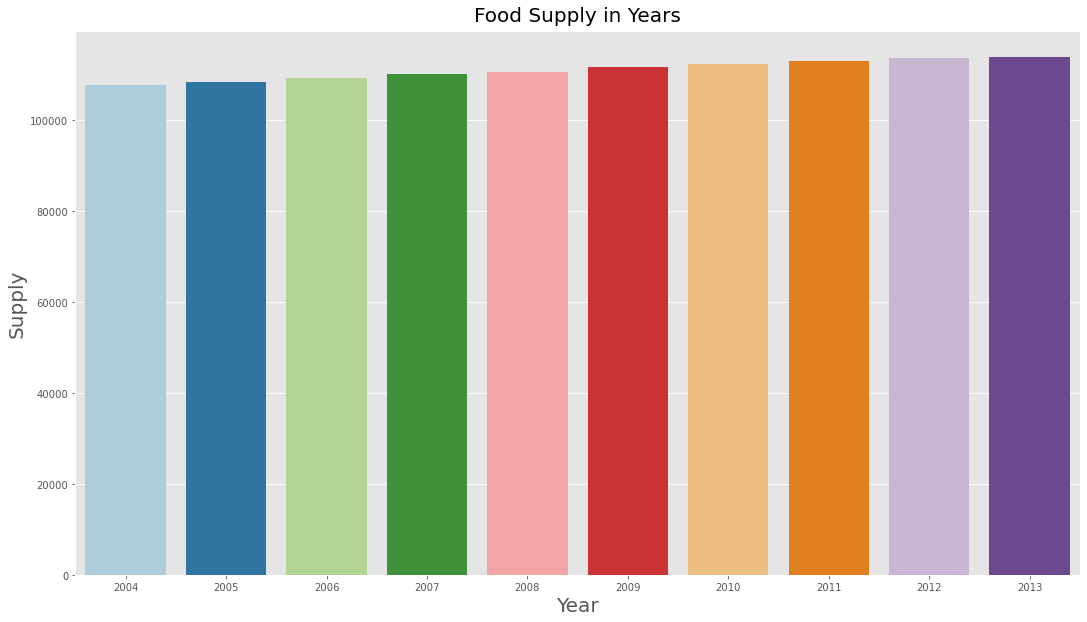

In [9]:
# Number of Food items supplied per year

plt.figure(figsize = (18,10))
year_prod = africa_supply.groupby('Year').Value.sum().to_frame().reset_index()
sns.barplot(x=year_prod.Year, y=year_prod.Value, palette = "Paired")
plt.xlabel("Year", size = 20)
plt.ylabel("Supply", size = 20)
plt.title('Food Supply in Years', fontsize = 20, pad = 10)
plt.show()

As seen above, there have been a consistent rise in Africa food supply between the year 2004 and 2013.

In [10]:
# Average food Consumption per year

country_g = pd.pivot_table(data = africa_supply[["Year", "Value"]], index = ["Year"], values = "Value", aggfunc = "mean")
country_g.sort_values(by = "Value", ascending = False).head(10)

,Value
Year,
2013,2532.244444
2012,2527.644444
2011,2515.422222
2010,2497.400000
2009,2482.222222
2008,2460.755556
2007,2447.755556
2006,2430.800000
2005,2409.288889


In [11]:
# Country with total supplies

country_g = pd.pivot_table(data = africa_supply[["Country", "Value"]], index = ["Country"], values = "Value", aggfunc = "sum")
country_g.sort_values(by = "Value", ascending = False).head(10)

,Value
Country,
Egypt,34580
Tunisia,33055
Morocco,32967
Algeria,31118
Mauritius,30543
South Africa,29629
Ghana,29180
Cote d'Ivoire,27666
Mali,27502


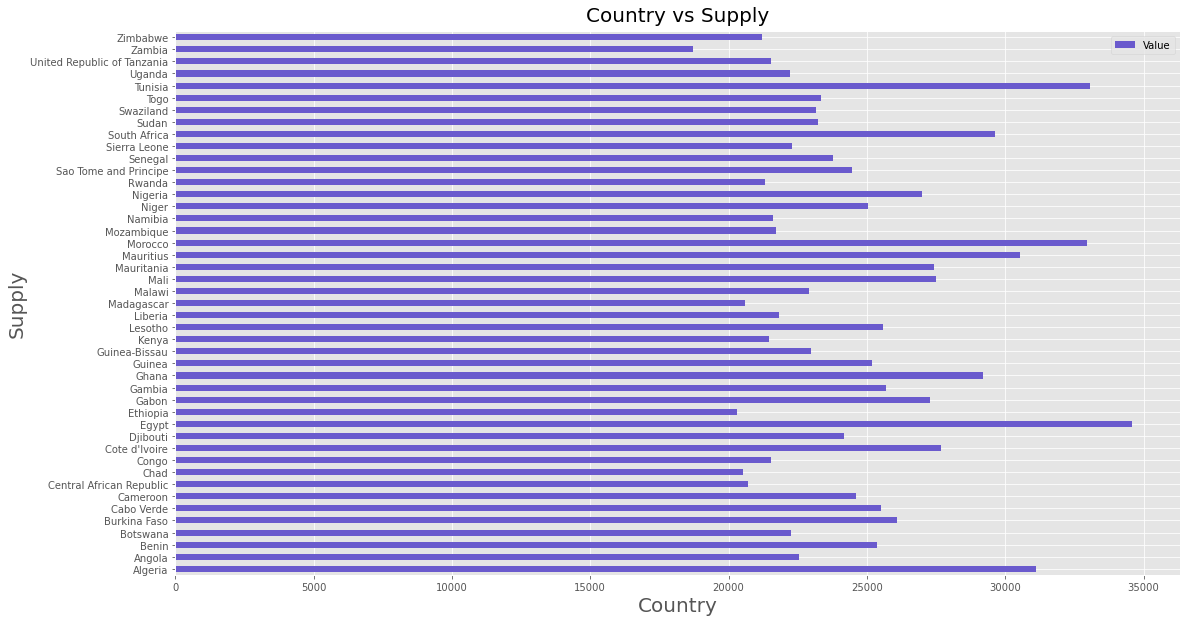

In [12]:
# Food Supply countries in Africa

country_g.plot(kind = "barh", color = "slateblue", figsize = (18, 10))
plt.xlabel("Country", size = 20)
plt.ylabel("Supply", size = 20)
plt.title("Country vs Supply", fontsize = 20, pad = 10)
plt.show()

From the chart above, it is seen that Egypt followed by Tunisha and Morocco are the top three countries with the highest food supply per capital between the year 2004 and 2013.

<AxesSubplot:xlabel='Year', ylabel='Value'>

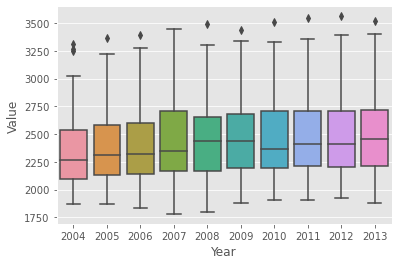

In [13]:
# Checking for outliers

sns.boxplot(x = "Year", y = "Value", data = africa_supply)

The Plot above shows that there is one outlier in the year 2012.

## Correlation

In [14]:
corr, _ = pearsonr(africa_supply["Year"], africa_supply["Value"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.122


A correlation of 0.122 as seen above indicates that there is no linear relationship between the variables.

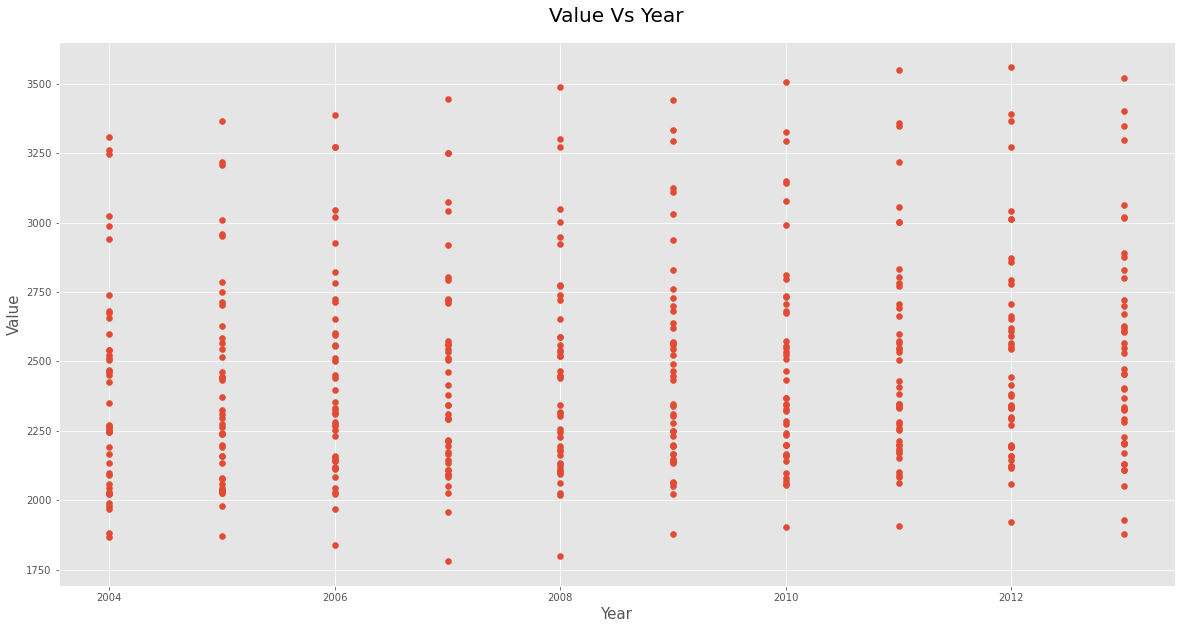

In [15]:
## Showing the correlation with a scatter plot

x = africa_supply["Year"]
y = africa_supply["Value"]


x_axis = africa_supply["Year"]
y_axis = africa_supply["Value"]

plt.figure(figsize = (20, 10))
plt.scatter(x, y)
plt.title("Value Vs Year", fontsize = 20, pad = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Value", size = 15)
plt.show()


## THANK YOU